In [9]:
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from prettytable import PrettyTable

In [43]:
def get_data(data , test_set_ratio , train_set_cnt):
    train_data_total,test_data = train_test_split(data,test_size=test_set_ratio)
    size = int(len(train_data_total)/train_set_cnt)
    train_data = []
    for i in range(train_set_cnt - 1):
        train_data_total,train_data_set = train_test_split(train_data_total,test_size=size)
        train_data.append(train_data_set)
        train_data.append(train_data_total)

    data_dic = {}
    data_dic['train_data'] = train_data
    data_dic['test_data'] = test_data

    return data_dic




In [44]:
def get_bias(prediction , actual , model_cnt):
    sum = 0
    for i in range(len(actual)):
        sum += (actual[i] - np.mean(np.array(prediction)[:,i:i+1]))**2

    return sum/len(actual)

def get_variance(prediction, model_cnt):
    var=np.var(prediction,axis=0)
    return np.sum(var)/len(prediction[1])

In [45]:
def train_data(data_dic , models_cnt , max_degree ,bias ,variance):

    for i in range(max_degree):
        prediction = []
        poly = PolynomialFeatures(i+1)
        for j in range(models_cnt):
            model = LinearRegression().fit(poly.fit_transform(data_dic['train_data'][j][:,0:1]) , data_dic['train_data'][j][:,1:2])
            pred = model.predict(poly.fit_transform(data_dic['test_data'][:,0:1]))
            prediction.append(pred)
        bias.append(get_bias(prediction , data_dic['test_data'][:,1:2] , models_cnt))
        variance.append(get_variance(prediction, models_cnt))
 



In [46]:
pip install prettytable

In [47]:
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

models_cnt =10
max_degree = 9
data_dic = get_data(data ,0.1 , models_cnt)

bias = []
variance = []
train_data(data_dic , models_cnt , max_degree ,bias ,variance)
bias_real=np.sqrt(bias)
table = PrettyTable()
table.field_names = ["Degree", "Bias^2", "Variance","Bias"]
for i in range(max_degree):
	table.add_row([ i+1,float(bias[i]),variance[i],float(bias_real[i])])
print(table)



+--------+--------------------+----------------------+--------------------+
| Degree |       Bias^2       |       Variance       |        Bias        |
+--------+--------------------+----------------------+--------------------+
|   1    | 30.243333617843447 |  0.0809132783187851  | 5.499393931865897  |
|   2    | 6.312119234611656  | 0.011198311722376989 | 2.5123931289930836 |
|   3    | 5.347694985761107  | 0.015278070834336795 | 2.312508375284532  |
|   4    | 3.1265836880018734 | 0.010047814703527664 | 1.7682148308398145 |
|   5    | 2.9961508234637937 | 0.012608054330455011 | 1.730939289363955  |
|   6    | 2.5733400072003483 | 0.01527673911751853  | 1.6041633355741391 |
|   7    | 2.4429474228333214 | 0.016737796511949392 | 1.5629930975002166 |
|   8    |  2.40892337153191  | 0.017218052037200643 | 1.5520706722091975 |
|   9    | 2.419471246832527  | 0.016477872728559002 | 1.5554649616216134 |
+--------+--------------------+----------------------+--------------------+


In [54]:
def get_data():
    
    with open('X_train.pkl', 'rb') as f:
        x_train = pickle.load(f)

    with open('Y_train.pkl', 'rb') as f:
        y_train = pickle.load(f)

    with open('X_test.pkl', 'rb') as f:
        x_test = pickle.load(f)

    with open('Fx_test.pkl', 'rb') as f:
        y_test = pickle.load(f)

    test = np.array(x_test)
    test_x=test.reshape(-1,1)
    tet_y = np.array(y_test)
    test_y=tet_y.reshape(-1,1)
    test=np.hstack((test_x,test_y))
    train=[]



    for i in range(len(x_train)):
        tmp=np.array(x_train[i])
        tmp2=tmp.reshape(-1,1)
        tmp3=np.array(y_train[i])
        tmp4=tmp3.reshape(-1,1)
        tmp5 = np.hstack((tmp2,tmp4))
        train.append(tmp5)



    data_dic = {}
    data_dic['train_data'] = np.array(train)
    data_dic['test_data'] = np.array(test)

    return data_dic

In [55]:
def get_bias(prediction , actual , model_cnt):
    sum = 0
    for i in range(len(actual)):
        sum += (actual[i] - np.mean(np.array(prediction)[:,i:i+1]))**2

    return sum/len(actual)


In [56]:
def get_variance(prediction, model_cnt):
    var=np.var(prediction,axis=0)
    return np.sum(var)/len(prediction[1])

In [57]:
def train_data(data_dic , models_cnt , max_degree ,bias ,variance):

    for i in range(max_degree):
        prediction = []
        poly = PolynomialFeatures(i+1)
        for j in range(models_cnt):
            model = LinearRegression().fit(poly.fit_transform(data_dic['train_data'][j][:,0:1]) , data_dic['train_data'][j][:,1:2])
            pred = model.predict(poly.fit_transform(data_dic['test_data'][:,0:1]))
            prediction.append(pred)
        bias.append(get_bias(prediction , data_dic['test_data'][:,1:2] , models_cnt))
        variance.append(get_variance(prediction, models_cnt))	
        plt.scatter(data_dic['test_data'][:,0:1],data_dic['test_data'][:,1:2])
        plt.scatter(data_dic['test_data'][:,0:1],prediction[0])
        plt.show() 


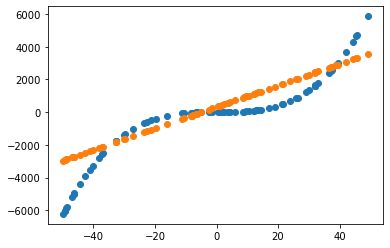

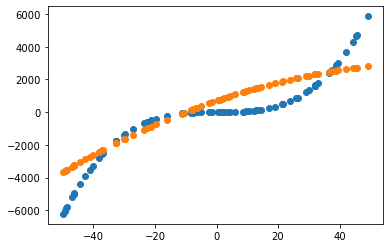

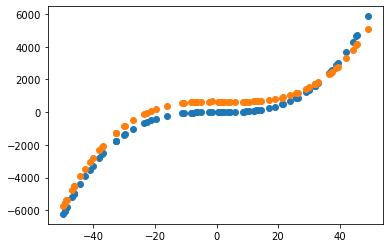

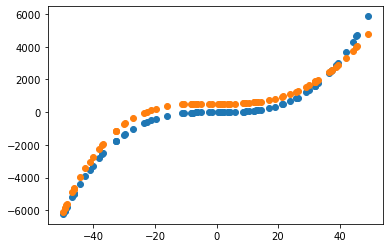

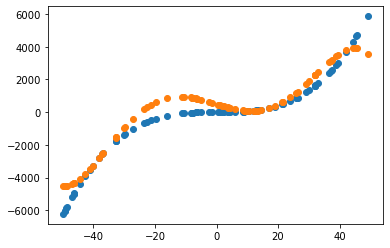

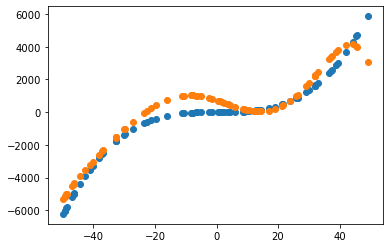

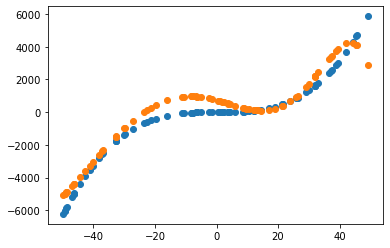

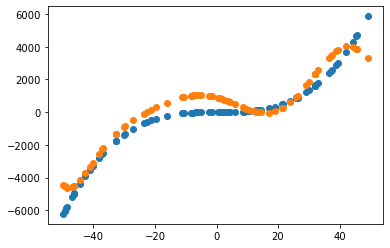

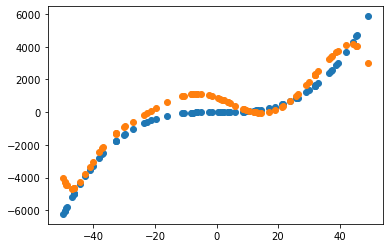

80
+--------+--------------------+--------------------+--------------------+
| Degree |       Bias^2       |      Variance      |        Bias        |
+--------+--------------------+--------------------+--------------------+
|   1    | 999228.3968719237  | 70545.48914575044  | 999.6141239858127  |
|   2    |  954619.273794425  | 125870.8555487734  | 977.0461983931082  |
|   3    | 9389.730116788864  | 150073.73954646348 | 96.90061979568998  |
|   4    | 10907.34813412703  | 212235.70832578203 | 104.43825034022272 |
|   5    | 9339.194287110551  | 276388.4802557783  | 96.63950686500087  |
|   6    | 10248.586613922478 | 316863.49932286504 | 101.23530319963722 |
|   7    | 10335.284053268439 | 357510.87549896125 | 101.66259908770992 |
|   8    | 10149.22850295093  | 404291.0384997277  | 100.74337944972329 |
|   9    | 10888.427503300481 | 458356.9032138247  | 104.34762816327202 |
+--------+--------------------+--------------------+--------------------+


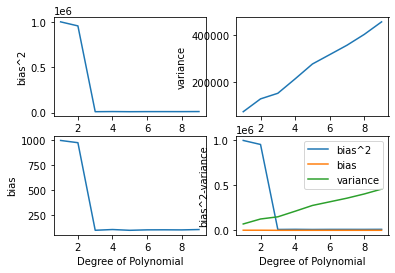

In [58]:
models_cnt =20
max_degree = 9
data_dic = get_data()

bias = []
variance = []
train_data(data_dic , models_cnt , max_degree ,bias ,variance)
print(len(data_dic['test_data']))
table = PrettyTable()
table.field_names = ["Degree", "Bias^2", "Variance","Bias"]
degree=[]
total_error=[]
bias_real=np.sqrt(bias)	
for i in range(max_degree):
    table.add_row([ i+1,float(bias[i]),variance[i],float(bias_real[i])])
    total_error.append(variance[i]+bias[i])
    degree.append(i+1)
print(table)
fig, axs = plt.subplots(2,2)
axs[0][0].plot(degree, bias)
axs[0][0].set_ylabel("bias^2")
axs[0][1].plot(degree, variance)
axs[0][1].set_ylabel("variance")
axs[1][0].plot(degree, bias_real)
axs[1][0].set_ylabel("bias")
axs[1][0].set_xlabel("Degree of Polynomial")
axs[1][1].plot(degree,bias,label="bias^2")
axs[1][1].plot(degree,bias_real,label="bias")
axs[1][1].plot(degree,variance,label="variance")
plt.legend()
axs[1][1].set_ylabel("bias^2-variance")
axs[1][1].set_xlabel("Degree of Polynomial")
plt.show()